In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from subprocess import call

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [4]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, Y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)

Out[4]: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
 max_features=None, max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, presort=False, random_state=0,
 splitter='best')

In [5]:
%sh sudo apt install python-pydot python-pydot-ng graphviz

WARNING: apt does not have a stable CLI interface. Use with caution in scripts.

E: Could not get lock /var/lib/dpkg/lock-frontend - open (11: Resource temporarily unavailable)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), is another process using it?

In [6]:
%sh pip install graphviz ; pip install pydotplus

In [7]:
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.externals.six import StringIO

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, filled=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')

--------------------------------------------------------------------------- 
 PermissionError Traceback (most recent call last)
 <command-3880413045668769> in <module> 
 11 
 12 graph = pydotplus . graph_from_dot_data ( dot_data . getvalue ( ) ) 
 ---> 13 graph . write_png ( 'tree.png' ) 

 /databricks/python/lib/python3.7/site-packages/pydotplus/graphviz.py in <lambda> (path, f, prog) 
 1808 lambda path , 
 1809 f = frmt , 
 -> 1810 prog = self . prog : self . write ( path , format = f , prog = prog ) 
 1811 )
 1812 

 /databricks/python/lib/python3.7/site-packages/pydotplus/graphviz.py in write (self, path, prog, format) 
 1892 prog = self . prog
 1893 
 -> 1894 fobj , close = get_fobj ( path , 'w+b' ) 
 1895 try : 
 1896 if format == 'raw' : 

 /databricks/python/lib/python3.7/site-packages/pydotplus/graphviz.py in get_fobj (fname, mode) 
 148 """
 149 if is_string_like ( fname ) : 
 --> 150 fobj = open ( fname , mode ) 
 151 close = True 
 152 elif hasattr ( fname , 'write' ) : 

 PermissionError : [Errno 13] Permission denied: 'tree.png'

In [8]:
someDF = spark.createDataFrame(["10","11","13"], "string").toDF("age")
someDF.write.save("someDF")

In [9]:
def plot_graphviz_databricks(model, filename="tree.dot", png="tree.png"):
  fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
  cn=['setosa', 'versicolor', 'virginica']

  tree.export_graphviz(model,
                       out_file=filename,
                       feature_names = fn, 
                       class_names=cn,
                       filled = True)
  
  call(['dot', '-Tpng', filename, '-o', 'png', '-Gdpi=600'])
  
  plt.figure(figsize = (14, 18))
  plt.imshow(plt.imread(png))
  plt.axis('off');
  plt.show();

In [10]:
dbutils.fs.ls('.')

Out[28]: [FileInfo(path='dbfs:/FileStore/', name='FileStore/', size=0),
 FileInfo(path='dbfs:/databricks-datasets/', name='databricks-datasets/', size=0),
 FileInfo(path='dbfs:/databricks-results/', name='databricks-results/', size=0),
 FileInfo(path='dbfs:/ml/', name='ml/', size=0),
 FileInfo(path='dbfs:/mnt/', name='mnt/', size=0),
 FileInfo(path='dbfs:/saveLicense/', name='saveLicense/', size=0),
 FileInfo(path='dbfs:/someDF/', name='someDF/', size=0),
 FileInfo(path='dbfs:/test/', name='test/', size=0),
 FileInfo(path='dbfs:/testFolderForWriteAccess/', name='testFolderForWriteAccess/', size=0),
 FileInfo(path='dbfs:/tmp/', name='tmp/', size=0),
 FileInfo(path='dbfs:/user/', name='user/', size=0)]

In [11]:
plot_graphviz_databricks(clf)

--------------------------------------------------------------------------- 
 PermissionError Traceback (most recent call last)
 <command-2384666754537323> in <module> 
 ----> 1 plot_graphviz_databricks ( clf ) 

 <command-2384666754537322> in plot_graphviz_databricks (model, filename, png) 
 7 feature_names = fn , 
 8 class_names = cn , 
 ----> 9 filled = True)
 10 
 11 call ( [ 'dot' , '-Tpng' , filename , '-o' , 'png' , '-Gdpi=600' ] ) 

 /databricks/python/lib/python3.7/site-packages/sklearn/tree/_export.py in export_graphviz (decision_tree, out_file, max_depth, feature_names, class_names, label, filled, leaves_parallel, impurity, node_ids, proportion, rotate, rounded, special_characters, precision) 
 748 try : 
 749 if isinstance ( out_file , str ) : 
 --> 750 out_file = open ( out_file , "w" , encoding = "utf-8" ) 
 751 own_file = True 
 752 

 PermissionError : [Errno 13] Permission denied: 'tree.dot'

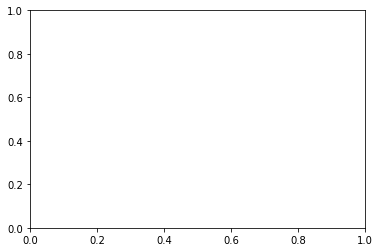

In [12]:
# plot xgboost tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from xgboost import plot_tree

# load data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

# fit model no training data
model = XGBClassifier()
model.fit(X_train, Y_train)
# plot single tree
plot_tree(model)
plt.show()


In [13]:
import os
 
for k, v in os.environ.items():
    print(f'{k}={v}')

PATH=/databricks/conda/envs/databricks-ml/bin:/databricks/conda/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/snap/bin
container=lxc
CONDA_DEFAULT_ENV=databricks-ml
SPARK_ENV_LOADED=1
JAVA_OPTS= -Djava.io.tmpdir=/local_disk0/tmp -XX:MaxPermSize=512m -XX:-OmitStackTraceInFastThrow -Djava.security.properties=/databricks/spark/dbconf/java/extra.security -XX:+PrintFlagsFinal -XX:+PrintGCDateStamps -verbose:gc -XX:+PrintGCDetails -Xss4m -Djavax.xml.datatype.DatatypeFactory=com.sun.org.apache.xerces.internal.jaxp.datatype.DatatypeFactoryImpl -Djavax.xml.parsers.DocumentBuilderFactory=com.sun.org.apache.xerces.internal.jaxp.DocumentBuilderFactoryImpl -Djavax.xml.parsers.SAXParserFactory=com.sun.org.apache.xerces.internal.jaxp.SAXParserFactoryImpl -Djavax.xml.validation.SchemaFactory:http://www.w3.org/2001/XMLSchema=com.sun.org.apache.xerces.internal.jaxp.validation.XMLSchemaFactory -Dorg.xml.sax.driver=com.sun.org.apache.xerces.internal.parsers.SAXParser -Dorg.w3c.dom.DOMImplementationSourceList=com.sun.org.apache.xerces.internal.dom.DOMXSImplementationSourceImpl -Djavax.net.ssl.sessionCacheSize=10000 -Dscala.reflect.runtime.disable.typetag.cache=true -Ddatabricks.serviceName=driver-1 -Xms6260m -Xmx6260m -Dspark.ui.port=43445 -Dspark.executor.extraJavaOptions="-Djava.io.tmpdir=/local_disk0/tmp -XX:ReservedCodeCacheSize=256m -XX:+UseCodeCacheFlushing -Djava.security.properties=/databricks/spark/dbconf/java/extra.security -XX:+PrintFlagsFinal -XX:+PrintGCDateStamps -verbose:gc -XX:+PrintGCDetails -Xss4m -Djavax.xml.datatype.DatatypeFactory=com.sun.org.apache.xerces.internal.jaxp.datatype.DatatypeFactoryImpl -Djavax.xml.parsers.DocumentBuilderFactory=com.sun.org.apache.xerces.internal.jaxp.DocumentBuilderFactoryImpl -Djavax.xml.parsers.SAXParserFactory=com.sun.org.apache.xerces.internal.jaxp.SAXParserFactoryImpl -Djavax.xml.validation.SchemaFactory:http://www.w3.org/2001/XMLSchema=com.sun.org.apache.xerces.internal.jaxp.validation.XMLSchemaFactory -Dorg.xml.sax.driver=com.sun.org.apache.xerces.internal.parsers.SAXParser -Dorg.w3c.dom.DOMImplementationSourceList=com.sun.org.apache.xerces.internal.dom.DOMXSImplementationSourceImpl -Djavax.net.ssl.sessionCacheSize=10000 -Dscala.reflect.runtime.disable.typetag.cache=true -Ddatabricks.serviceName=spark-executor-1" -Dspark.executor.memory=7284m -Dspark.executor.extraClassPath=/databricks/spark/dbconf/log4j/executor:/databricks/spark/dbconf/jets3t/:/databricks/spark/dbconf/hadoop:/databricks/hive/conf:/databricks/jars/api-base--api-base_java-spark_3.0_2.12_deploy.jar:/databricks/jars/api-base--api-base-spark_3.0_2.12_deploy.jar:/databricks/jars/api--rpc--rpc_parser-spark_3.0_2.12_deploy.jar:/databricks/jars/----argparse4j_0_7_0_jar--jar--downloaded.jar:/databricks/jars/chauffeur-api--api--endpoints--endpoints-spark_3.0_2.12_deploy.jar:/databricks/jars/chauffeur-api--chauffeur-api-spark_3.0_2.12_deploy.jar:/databricks/jars/common--client--client-spark_3.0_2.12_deploy.jar:/databricks/jars/common--common-spark_3.0_2.12_deploy.jar:/databricks/jars/common--credentials--credentials-spark_3.0_2.12_deploy.jar:/databricks/jars/common--hadoop--hadoop-spark_3.0_2.12_deploy.jar:/databricks/jars/common--jetty--client--client-spark_3.0_2.12_deploy.jar:/databricks/jars/common--lazy--lazy-spark_3.0_2.12_deploy.jar:/databricks/jars/common--libcommon_resources.jar:/databricks/jars/common--path--path-spark_3.0_2.12_deploy.jar:/databricks/jars/common--rate-limiter--rate-limiter-spark_3.0_2.12_deploy.jar:/databricks/jars/common--storage--storage-spark_3.0_2.12_deploy.jar:/databricks/jars/common--tracing--tracing-spark_3.0_2.12_deploy.jar:/databricks/jars/common--util--locks-spark_3.0_2.12_deploy.jar:/databricks/jars/daemon--data--client--client-spark_3.0_2.12_deploy.jar:/databricks/jars/daemon--data--client--conf--conf-spark_3.0_2.12_deploy.jar:/databricks/jars/daemon--data--client--utils-spark_3.0_2.12_deploy.jar:/databricks/jars/daemon--data--data-common--data-common-spark_3.0_2.12_deplo

In [14]:
dbutils.fs.ls("/databricks/python/lib/")

--------------------------------------------------------------------------- 
 ExecutionError Traceback (most recent call last)
 <command-1702532147109538> in <module> 
 ----> 1 dbutils . fs . ls ( "/databricks/python/lib/" ) 

 /local_disk0/tmp/1597861862958-0/dbutils.py in f_with_exception_handling (*args, **kwargs) 
 312 exc . __context__ = None 
 313 exc . __cause__ = None 
 --> 314 raise exc
 315 return f_with_exception_handling
 316 

 ExecutionError : An error occurred while calling z:com.databricks.backend.daemon.dbutils.FSUtils.ls.
: java.io.FileNotFoundException: File/2105657683395063/databricks/python/lib does not exist.
	at shaded.databricks.org.apache.hadoop.fs.azure.NativeAzureFileSystem.listStatus(NativeAzureFileSystem.java:2451)
	at com.databricks.backend.daemon.data.client.DBFSV2.$anonfun$listStatus$2(DatabricksFileSystemV2.scala:96)
	at com.databricks.s3a.S3AExeceptionUtils$.convertAWSExceptionToJavaIOException(DatabricksStreamUtils.scala:66)
	at com.databricks.backend.daemon.data.client.DBFSV2.$anonfun$listStatus$1(DatabricksFileSystemV2.scala:93)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$4(UsageLogging.scala:430)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:238)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:233)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:230)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV2.withAttributionContext(DatabricksFileSystemV2.scala:454)
	at com.databricks.logging.UsageLogging.withAttributionTags(UsageLogging.scala:275)
	at com.databricks.logging.UsageLogging.withAttributionTags$(UsageLogging.scala:268)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV2.withAttributionTags(DatabricksFileSystemV2.scala:454)
	at com.databricks.logging.UsageLogging.recordOperation(UsageLogging.scala:411)
	at com.databricks.logging.UsageLogging.recordOperation$(UsageLogging.scala:337)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV2.recordOperation(DatabricksFileSystemV2.scala:454)
	at com.databricks.backend.daemon.data.client.DBFSV2.listStatus(DatabricksFileSystemV2.scala:93)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystem.listStatus(DatabricksFileSystem.scala:150)
	at com.databricks.backend.daemon.dbutils.FSUtils$.$anonfun$ls$1(DBUtilsCore.scala:86)
	at com.databricks.backend.daemon.dbutils.FSUtils$.withFsSafetyCheck(DBUtilsCore.scala:81)
	at com.databricks.backend.daemon.dbutils.FSUtils$.ls(DBUtilsCore.scala:85)
	at com.databricks.backend.daemon.dbutils.FSUtils.ls(DBUtilsCore.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:380)
	at py4j.Gateway.invoke(Gateway.java:295)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:251)
	at java.lang.Thread.run(Thread.java:748)

In [15]:
help("Graphviz")

No Python documentation found for 'Graphviz'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.

In [16]:
%execute apt-get install graphviz

UsageError: Line magic function `%execute` not found.